In [53]:
import os
import pandas as pd
import matplotlib.lines as mlines
from df_utils import create_df, create_sparse_df_tracking
from plot_utils import plot_distance_to_target, plot_time_inside_target, plot_deviation_count
import matplotlib.pyplot as plt
import numpy as np

In [54]:
effort_models = ["zero_effort", "dc_effort_w1", "jac_effort_w1", "ctc_effort_w1", "armmovementpaper_effort"]
variations = ["3D_target_area"]
variant_names = ["Default", "3D"]
fontsize = 15
all_variants = ["default"] + variations
cmap = plt.get_cmap('plasma')
values = np.linspace(0, len(all_variants), len(all_variants)) 
colors = {key: cmap(v / (len(all_variants)+0.5)) for key, v in zip(all_variants, values)}
plt.rcParams.update({'font.size': fontsize})

In [55]:
#read data
folder = os.path.abspath(f"../../simulators/")
sparse_df = {}
sparse_df["default"], _ = create_df(["hit_bonus"], ["zero_effort"], ["dist"], folder, run_nr=1, task = "tracking")

for v in variations:
    sparse_df[v], _ = create_df(["hit_bonus"], ["zero_effort"], ["dist"], folder, run_nr=1, task = "tracking", variation=v)

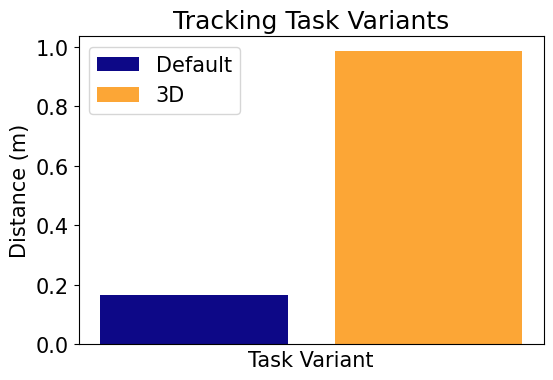

In [56]:
fig, ax = plt.subplots(figsize=(6, 4))

for i in range(len(all_variants)):
    ax.bar(i, sparse_df[all_variants[i]]['distance_to_target'], label=variant_names[i], color=colors[all_variants[i]])

plt.title("Tracking Task Variants")
plt.legend()
plt.yticks(fontsize=fontsize)
plt.xticks([])
plt.xlabel("Task Variant", fontsize=fontsize)
plt.ylabel("Distance (m)", fontsize=fontsize)
plt.savefig("tracking_variants/distance_to_target_bonus_dist")

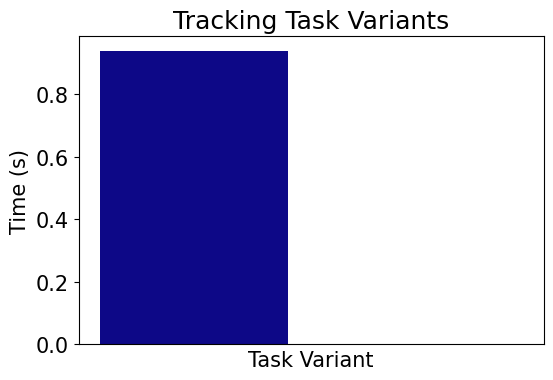

In [57]:
fig, ax = plt.subplots(figsize=(6, 4))

for i in range(len(all_variants)):
    ax.bar(i, sparse_df[all_variants[i]]['time_inside_target'], label=all_variants[i], color=colors[all_variants[i]])

plt.title("Tracking Task Variants")
plt.yticks(fontsize=fontsize)
plt.xticks([])
plt.xlabel("Task Variant", fontsize=fontsize)
plt.ylabel("Time (s)", fontsize=fontsize)
plt.savefig("tracking_variants/time_inside_target_bonus_dist")

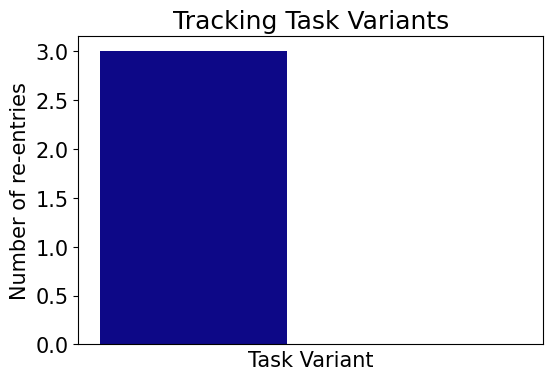

In [58]:
fig, ax = plt.subplots(figsize=(6, 4))

for i in range(len(all_variants)):
    ax.bar(i, sparse_df[all_variants[i]]['deviation_count'], label=all_variants[i], color=colors[all_variants[i]])

plt.title("Tracking Task Variants")
plt.yticks(fontsize=fontsize)
plt.xticks([])
plt.xlabel("Task Variant", fontsize=fontsize)
plt.ylabel("Number of re-entries", fontsize=fontsize)
plt.savefig("tracking_variants/deviation_count_bonus_dist")